## Data Import from Kaggle

In [ ]:
#In Colab, you need to install the Kaggle library.
!pip install -q kaggle;

In [ ]:
# json token file
from google.colab import files
files.upload();

Saving kaggle.json to kaggle.json


In [ ]:
#Move the uploaded kaggle.json file to the appropriate directory.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
#change the permission of the file
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#list of datasets with the word alzheimers
!kaggle datasets list -s alzheimers
!kaggle datasets download -d tourist55/alzheimers-dataset-4-class-of-images
! mkdir Omdena
! unzip alzheimers-dataset-4-class-of-images.zip -d Omdena/

In [ ]:
# Import libraries
from keras.preprocessing.image import ImageDataGenerator
import os
import numpy as np
from PIL import Image
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
import matplotlib.pyplot as plt
import pandas as pd

## Model Training

## Particle Swarm Optimizer

1.   Paper: [Optimization of Convolutional Neural Network Using the Linearly Decreasing Weight Particle Swarm Optimization](https://https://arxiv.org/pdf/2001.05670.pdf)
2.   Library: [Hyperactive](https://https://github.com/SimonBlanke/Hyperactive)



In [ ]:
#Import Hyperactive
!pip install hyperactive

In [ ]:
from hyperactive import Hyperactive
from hyperactive.optimizers import ParticleSwarmOptimizer

### Data Preprocessing

In [ ]:
# Define path to the data directory
train_dir = "/content/Omdena/Alzheimer_s Dataset/train"

# Define image generator for training with augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Rescaling
    brightness_range=[0.2,1.0],  # Brightness
    zoom_range=0.2,  # Zooming
    fill_mode='nearest',  # Filling
    horizontal_flip=True,  # Flipping
    validation_split=0.2  # Setting the validation split to 20%
)

# Define image generator for validation with only rescaling
val_datagen = ImageDataGenerator(
    rescale=1./255,  # Rescaling
    validation_split=0.2  # Setting the validation split to 20%
)

# Create a training data flow
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),  # Set the target size to 150x150
    batch_size=32,
    class_mode="categorical",
    subset='training'  # Specify that this is the training data
)

# Create a validation data flow
val_data = val_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),  # Set the target size to 150x150
    batch_size=32,
    class_mode="categorical",
    subset='validation'  # Specify that this is the validation data
)


Found 4098 images belonging to 4 classes.
Found 1023 images belonging to 4 classes.


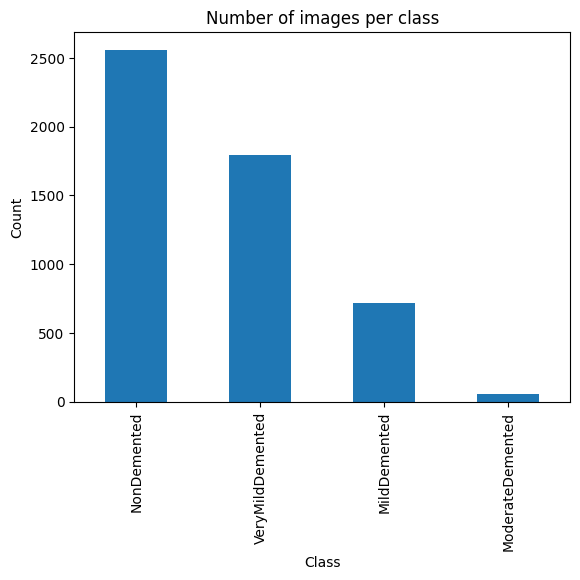

In [ ]:
# Get list of all classes
classes = os.listdir(train_dir)

# Count number of images per class
counts = {}
for class_name in classes:
    counts[class_name] = len(os.listdir(os.path.join(train_dir, class_name)))

# Convert to DataFrame for easier plotting
df_counts = pd.DataFrame.from_dict(counts, orient='index', columns=['count'])

# Create bar plot
df_counts.sort_values('count', ascending=False).plot(kind='bar', legend=False)
plt.title('Number of images per class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

### CNN Model

In [ ]:
def model(opt):
    # Define the model
    model = keras.Sequential([
        keras.layers.Conv2D(filters=opt["conv_filters"], kernel_size=opt["conv_kernel_size"], activation=opt["conv_activation"], input_shape=(150, 150, 3)),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Conv2D(filters=opt["conv_filters"], kernel_size=opt["conv_kernel_size"], activation=opt["conv_activation"]),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Flatten(),
        keras.layers.Dense(units=opt["dense_units"], activation=opt["dense_activation"]),
        keras.layers.Dense(units=4, activation="softmax")
    ])

    # Compile the model
    model.compile(optimizer=opt["optimizer"], loss="categorical_crossentropy", metrics=["accuracy"])

    # Train the model
    model.fit(train_data, epochs=opt["n_epochs"], batch_size=opt["batch_size"], verbose=2)

    # Evaluate the model
    score = model.evaluate(val_data)[1]

    return score


In [ ]:
search_config = {
    "n_epochs": [100],
    "batch_size": list(range(10, 100)),
    "optimizer": ["adam", "sgd","Adamax"],
    "conv_filters": list(range(4, 200)),
    "conv_kernel_size": [3, 5, 7],
    "conv_activation": ["sigmoid", "relu", "tanh"],
    "dense_units": list(range(4, 201)),
    "dense_activation": ["sigmoid", "relu", "tanh"],
}

# Create an instance of the optimizer
optimizer = ParticleSwarmOptimizer(
    inertia=0.4,
    cognitive_weight=0.7,
    social_weight=0.7,
    temp_weight=0.3,
    rand_rest_p=0.05,
)

# Create an instance of Hyperactive, add the search, and run it
hyper = Hyperactive()
hyper.add_search(model, search_config, optimizer=optimizer, n_iter=5)
hyper.run()

[0] model (Particle Swarm Optimization):   0%|          | 0/5 [00:00<?, ?it/s]

Epoch 1/100
129/129 - 35s - loss: 1.0453 - accuracy: 0.4929 - 35s/epoch - 269ms/step
Epoch 2/100
129/129 - 29s - loss: 1.0182 - accuracy: 0.5017 - 29s/epoch - 225ms/step
Epoch 3/100
129/129 - 28s - loss: 0.9942 - accuracy: 0.5154 - 28s/epoch - 219ms/step
Epoch 4/100
129/129 - 29s - loss: 0.9883 - accuracy: 0.5200 - 29s/epoch - 223ms/step
Epoch 5/100
129/129 - 29s - loss: 0.9707 - accuracy: 0.5439 - 29s/epoch - 224ms/step
Epoch 6/100
129/129 - 29s - loss: 0.9548 - accuracy: 0.5412 - 29s/epoch - 222ms/step
Epoch 7/100
129/129 - 29s - loss: 0.9437 - accuracy: 0.5542 - 29s/epoch - 223ms/step
Epoch 8/100
129/129 - 29s - loss: 0.9373 - accuracy: 0.5473 - 29s/epoch - 221ms/step
Epoch 9/100
129/129 - 28s - loss: 0.9353 - accuracy: 0.5542 - 28s/epoch - 220ms/step
Epoch 10/100
129/129 - 28s - loss: 0.9301 - accuracy: 0.5505 - 28s/epoch - 221ms/step
Epoch 11/100
129/129 - 28s - loss: 0.9176 - accuracy: 0.5669 - 28s/epoch - 220ms/step
Epoch 12/100
129/129 - 28s - loss: 0.9086 - accuracy: 0.5805 - 

In [ ]:
# Best parameter set:
n_epochs = 15
batch_size = 57
optimizer = 'adam'
conv_filters = 20
conv_kernel_size = 5
conv_activation = 'relu'
dense_units = 76
dense_activation = 'relu'

In [ ]:
model_bestparam = keras.Sequential([
    keras.layers.Conv2D(filters=conv_filters, kernel_size=conv_kernel_size, activation=conv_activation, input_shape=(224, 224, 3)),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Conv2D(filters=conv_filters, kernel_size=conv_kernel_size, activation=conv_activation),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(units=dense_units, activation=dense_activation),
    keras.layers.Dense(units=4, activation="softmax")
])

# Compile the model
model_bestparam.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

# Train the model
model_bestparam.fit(train_unbalanced, epochs=n_epochs, batch_size=batch_size, verbose=2)


Epoch 1/15
161/161 - 78s - loss: 1.0779 - accuracy: 0.5134 - 78s/epoch - 487ms/step
Epoch 2/15
161/161 - 67s - loss: 0.9201 - accuracy: 0.5653 - 67s/epoch - 416ms/step
Epoch 3/15
161/161 - 61s - loss: 0.8822 - accuracy: 0.5753 - 61s/epoch - 381ms/step
Epoch 4/15
161/161 - 62s - loss: 0.8384 - accuracy: 0.5997 - 62s/epoch - 384ms/step
Epoch 5/15
161/161 - 60s - loss: 0.8008 - accuracy: 0.6218 - 60s/epoch - 371ms/step
Epoch 6/15
161/161 - 62s - loss: 0.7572 - accuracy: 0.6389 - 62s/epoch - 385ms/step
Epoch 7/15
161/161 - 60s - loss: 0.7361 - accuracy: 0.6555 - 60s/epoch - 372ms/step
Epoch 8/15
161/161 - 61s - loss: 0.6923 - accuracy: 0.6782 - 61s/epoch - 380ms/step
Epoch 9/15
161/161 - 59s - loss: 0.6692 - accuracy: 0.6919 - 59s/epoch - 369ms/step
Epoch 10/15
161/161 - 62s - loss: 0.6257 - accuracy: 0.7110 - 62s/epoch - 387ms/step
Epoch 11/15
161/161 - 61s - loss: 0.5888 - accuracy: 0.7397 - 61s/epoch - 379ms/step
Epoch 12/15
161/161 - 62s - loss: 0.5751 - accuracy: 0.7432 - 62s/epoch - 

In [ ]:
# Assume 'model' is your trained model
model_bestparam.save('PSO_Model.Keras')

In [ ]:
model_bestparam.save('PSO_Model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### Metrics

  40/1279 [..............................] - ETA: 7:37

1279/1279 [==============================] - 15s 11ms/step
Accuracy: 0.40
                  precision    recall  f1-score   support

VeryMildDemented       0.13      0.06      0.08       179
     NonDemented       0.00      0.00      0.00        12
    MildDemented       0.51      0.40      0.45       640
ModerateDemented       0.36      0.54      0.43       448

        accuracy                           0.40      1279
       macro avg       0.25      0.25      0.24      1279
    weighted avg       0.40      0.40      0.39      1279



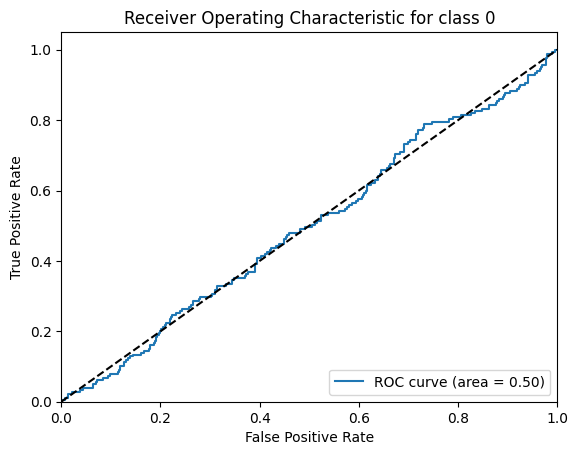

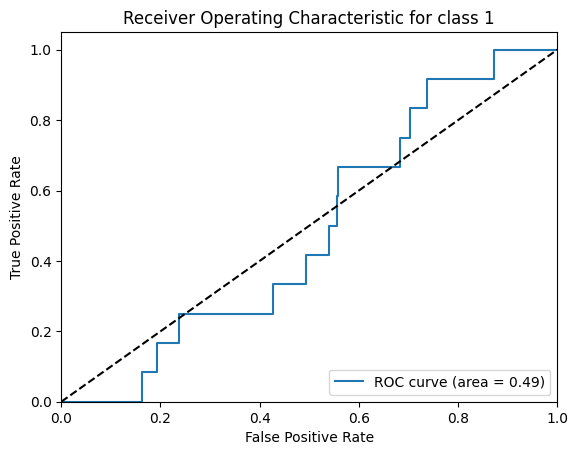

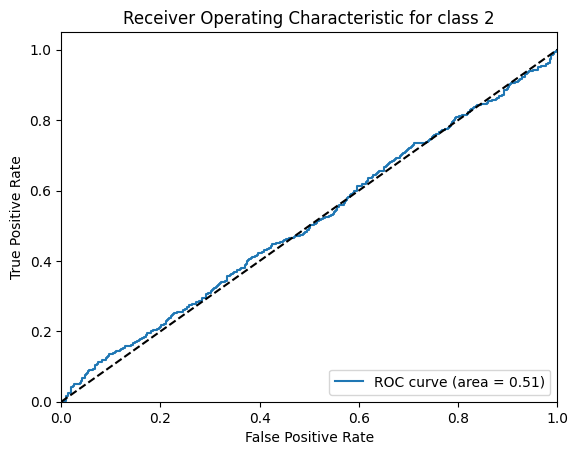

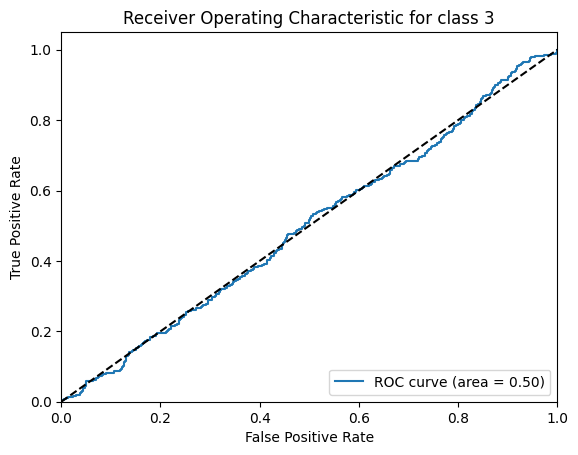

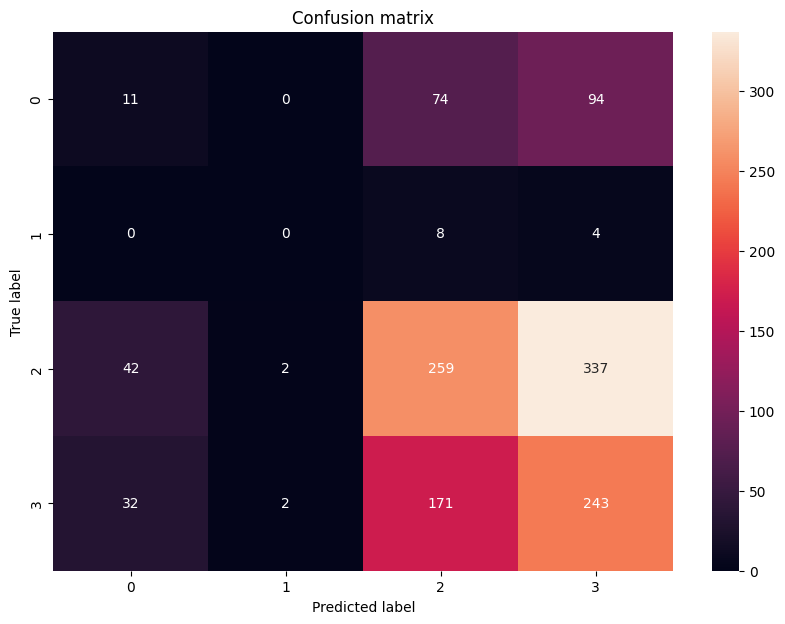

In [ ]:
from sklearn.metrics import roc_curve, auc, confusion_matrix, accuracy_score, recall_score, f1_score, classification_report
from sklearn.preprocessing import label_binarize
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Get the true labels and predicted probabilities
y_true = test_generator.classes
y_score = model_bestparam.predict(test_generator, steps=len(test_generator.filenames))

# Binarize the output
y_true_bin = label_binarize(y_true, classes=[0, 1, 2, 3])

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
num_classes = 4
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot ROC curve
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic for class {}'.format(i))
    plt.legend(loc="lower right")
    plt.savefig('roc_curve_class_{}.png'.format(i))  # Saves the ROC curve for class i

# Compute confusion matrix
cm = confusion_matrix(y_true, np.argmax(y_score, axis=1))

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.savefig('confusion_matrix.png')  # Saves the confusion matrix

# Compute accuracy
accuracy = accuracy_score(y_true, np.argmax(y_score, axis=1))
print('Accuracy: {:.2f}'.format(accuracy))

# Compute sensitivity (recall) and F1 score for each class
report = classification_report(y_true, np.argmax(y_score, axis=1), target_names=classes)
print(report)
